In [11]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import gensim 
from gensim.models import FastText


from sklearn.manifold import TSNE

In [2]:
# Data source path 
data_source_path = "../../DATA/"

In [3]:
# Import data
X = pd.read_csv(data_source_path+'clean_data/cleaning_plus_lemmatizing_input_train.csv', sep=";", index_col=0)
y = pd.read_csv(data_source_path+'output_train.csv', sep=";", index_col=0)

features = X.columns
targets = y['intention'].unique()

In [4]:
X = X[X['question'].notnull()]
X['question'].values

In [5]:
sentences = [sentence.split() for sentence in X['question']]

In [6]:
it_epoch = 3
def print_epoch(it):
    print(it)
    it+=1

# Train fasttext in french

In [7]:
EPOCHS = 5000
MIN_COUNT = 5
SIZE = 100
WINDOW = 4
ALPHA = 0.025
NGRAMS = 1
scratch_model  = FastText(sentences, 
                          size = SIZE, 
                          alpha=ALPHA, 
                          window=WINDOW, 
                          word_ngrams=NGRAMS,
                          min_count=MIN_COUNT, 
                          iter=EPOCHS)

In [8]:
"""To test : 
sg=1,
sample=0.01, 
iter=EPOCHS)"""

'To test : \nsg=1,\nsample=0.01, \niter=EPOCHS)'

In [9]:
scratch_model.wv.save_word2vec_format(fname = data_source_path+'trained_vectors/custom_word2vec/fr_lemmatizing_no_accent.bin', 
                                          fvocab=data_source_path+'trained_vectors/custom_word2vec/fr_vocab_lemmatizing_no_accent.txt', 
                                          binary=True)

## Test custom word2vec in french built from scratch

In [12]:
scratch_model_to_plot =gensim.models.KeyedVectors.load_word2vec_format(fname =data_source_path+'trained_vectors/custom_word2vec/fr_lemmatizing_no_accent.bin', 
                                                                       fvocab=data_source_path+'trained_vectors/custom_word2vec/fr_vocab_lemmatizing_no_accent.txt', 
                                                                       binary=True)

# Plot TSNE 
taken from https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

In [13]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


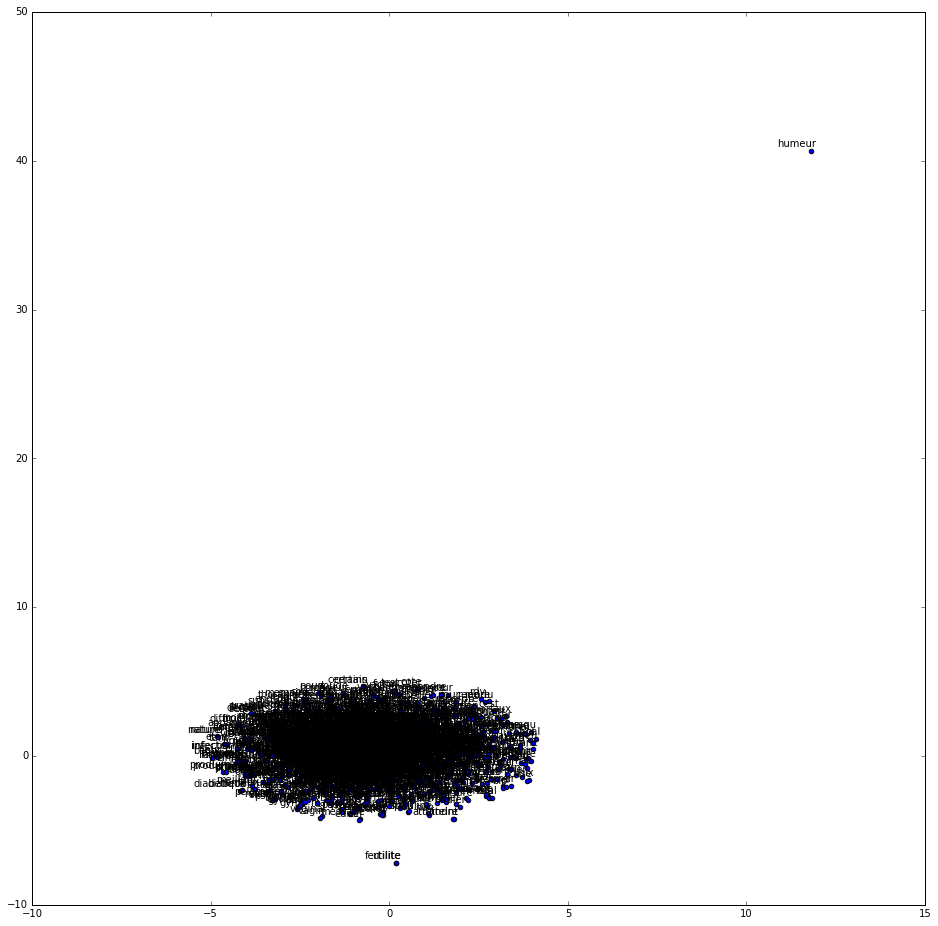

In [14]:
tsne_plot(scratch_model_to_plot)

In [29]:
scratch_model_to_plot.most_similar(["soleil"], topn=50)

[('inconvenient', 0.3536754250526428),
 ('levre', 0.31058257818222046),
 ('fleur', 0.3023443818092346),
 ('desoler', 0.2721838653087616),
 ('hta', 0.2664937376976013),
 ('machoire', 0.2590808570384979),
 ('produit', 0.2580035328865051),
 ('lutter', 0.2564842998981476),
 ('toiletter', 0.2521096169948578),
 ('deregler', 0.2483912706375122),
 ('chercher', 0.24621154367923737),
 ('complement', 0.2448248565196991),
 ('fil', 0.23938077688217163),
 ('jusque', 0.23894387483596802),
 ('stresam', 0.23796424269676208),
 ('osidique', 0.23592889308929443),
 ('estomac', 0.23410971462726593),
 ('derriere', 0.2274603396654129),
 ('irritation', 0.22634732723236084),
 ('graisser', 0.2261800765991211),
 ('produire', 0.225092351436615),
 ('commercialiser', 0.2234123945236206),
 ('libre', 0.2221110761165619),
 ('irritable', 0.21673914790153503),
 ('magnesium', 0.21663221716880798),
 ('point', 0.21454191207885742),
 ('insomnie', 0.2135554850101471),
 ('reaction', 0.21354572474956512),
 ('progesterone', 0.21